<a href="https://colab.research.google.com/github/saharkoohfar/EV-charging-load-forecasting/blob/main/EV_FIRTS_PAPER_FOR_NEXT_DAY%2C_MONTH%2C_SEASON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from pandas import DataFrame
from pandas import concat

from math import sqrt
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import IPython
import IPython.display
import matplotlib as mpl
import math

import argparse
import keras.callbacks as kc
from keras.layers import LSTM, GRU, Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dense, SimpleRNN
import tensorflow as tf
import seaborn as sns

import torch
from sklearn.model_selection import train_test_split
import time

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
mpl.rcParams['figure.figsize'] = (15, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
torch.manual_seed(5645)
import random
random.seed(5645)
np.random.seed(5645)


In [ ]:
data = pd.read_csv('EV-WEEKDAY.csv')
data.set_index('0ime', inplace=True)
data.index = pd.to_datetime(data.index)

# data.index = pd.to_datetime(data['Time'])
data['TIME'] = data.index
data = data.groupby([pd.Grouper(key='TIME', freq='D')]).sum()
data = data.dropna()
data.drop(data[data['Energy'] <= 0].index, inplace=True)
data.describe()
#data.drop(['weekday'], axis = 1)

,Energy,weekday,max0,pcpn,snow
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000
mean,179.839142,0.287018,66.785965,0.051425,0.248772
std,101.737500,0.452529,18.786420,0.159153,1.224779
min,0.749000,0.000000,4.000000,0.000000,0.000000
25%,97.172000,0.000000,52.000000,0.000000,0.000000
50%,166.575000,0.000000,67.000000,0.000000,0.000000
75%,251.477000,1.000000,83.000000,0.010000,0.000000
max,531.647000,1.000000,100.000000,1.580000,20.700000


  0%|          | 0/100 [00:00<?, ?it/s]

0.5325850786576354
1.1259594463368292


  1%|          | 1/100 [00:09<15:14,  9.23s/it]

1.6969865564001723
2.341338990435001
0.40562773046568595
0.8442333810639956


  2%|▏         | 2/100 [00:17<13:46,  8.43s/it]

1.2808933204719515
1.7499875457637875
0.3778328543650996
0.7894396576322603


  3%|▎         | 3/100 [00:22<11:07,  6.88s/it]

1.2066942905323517
1.6266210859769308
0.35089358657599273
0.735712132129069


  4%|▍         | 4/100 [00:27<09:51,  6.16s/it]

1.1248440981799797
1.5147281250213211
0.32284025215774503
0.6798121388918457


  5%|▌         | 5/100 [00:32<09:06,  5.76s/it]

1.037660654583575
1.4057657658262432
0.3059274448988211
0.645360639252605


  6%|▌         | 6/100 [00:37<08:37,  5.51s/it]

0.9826719200328933
1.3409953267887702
0.2962715704785352
0.6257062463552303


  7%|▋         | 7/100 [00:42<08:17,  5.35s/it]

0.9509823514352889
1.3048110921255787
0.2889131708501798
0.6101294531792443


  8%|▊         | 8/100 [00:49<08:52,  5.79s/it]

0.9261043910180159
1.274456609120039
0.28107817723705003
0.5930777092783471


  9%|▉         | 9/100 [00:53<08:23,  5.53s/it]

0.8993385589659464
1.2392093279851684
0.2727776807596794
0.5749021352904173


 10%|█         | 10/100 [00:59<08:03,  5.37s/it]

0.8711638410172742
1.2002590618193216
0.26513236865945766
0.5584601335362451


 11%|█         | 11/100 [01:04<07:48,  5.27s/it]

0.8457886539771275
1.164175282143258
0.2583180477722747
0.5443624409379111


 12%|█▏        | 12/100 [01:09<07:36,  5.19s/it]

0.824110408672188
1.1329708764307689
0.2512889664143862
0.5302967715106662


 13%|█▎        | 13/100 [01:14<07:26,  5.14s/it]

0.8026143066635605
1.102456324496318
0.2430795573999696
0.514253383839645


 14%|█▍        | 14/100 [01:19<07:18,  5.10s/it]

0.7781944382157877
1.068666486470436
0.23419404505206415
0.49709338186959284


 15%|█▌        | 15/100 [01:24<07:11,  5.07s/it]

0.7520297792268296
1.0333141802948616
0.2258328382024965
0.4809500534688968


 16%|█▌        | 16/100 [01:29<07:06,  5.07s/it]

0.7272634138774425
1.000449951699324
0.21834306419541766
0.46631003863924136


 17%|█▋        | 17/100 [01:34<07:00,  5.06s/it]

0.7046197389313409
0.9706271812024574
0.21115665483647644
0.45168662669546733


 18%|█▊        | 18/100 [01:39<06:54,  5.06s/it]

0.6819086386297804
0.9404064765537967
0.20391116275884896
0.436040082699775


 19%|█▉        | 19/100 [01:44<06:49,  5.06s/it]

0.6576025706863647
0.9075071434406312
0.19692053281355648
0.4200691449142514


 20%|██        | 20/100 [01:50<07:21,  5.52s/it]

0.6328013703506218
0.8734795008202889
0.1905560269885853
0.4048624203109684


 21%|██        | 21/100 [01:55<07:05,  5.38s/it]

0.6092391643838445
0.8409264853212084
0.18420089046958388
0.3899880102761091


 22%|██▏       | 22/100 [02:01<06:52,  5.29s/it]

0.5863011750821997
0.8092955092075897
0.17732050672349492
0.3742710594130779


 23%|██▎       | 23/100 [02:06<06:42,  5.22s/it]

0.5623161308376263
0.7764515684837785
0.1695493620031003
0.3573822417629493


 24%|██▍       | 24/100 [02:11<06:33,  5.18s/it]

0.5367647901911228
0.7416845054361287
0.16166127129319802
0.34092009917924504


 25%|██▌       | 25/100 [02:16<06:25,  5.15s/it]

0.511949777253675
0.7080012612675075
0.15468228998404562
0.3260757098353332


 26%|██▌       | 26/100 [02:21<06:18,  5.12s/it]

0.4896351655142902
0.6777273550426107
0.14851010037695905
0.31264064404676206


 27%|██▋       | 27/100 [02:26<06:12,  5.10s/it]

0.469363715779902
0.6499958653621867
0.1434923907623114
0.3008176946242983


 28%|██▊       | 28/100 [02:31<06:06,  5.09s/it]

0.4515806832866413
0.625568332848937
0.13964833595787227
0.2912912857518839


 29%|██▉       | 29/100 [02:36<06:01,  5.09s/it]

0.43722004072396936
0.6059738542473166
0.1361886523883523
0.2832394979926615


 30%|███       | 30/100 [02:41<05:54,  5.06s/it]

0.4250393795722968
0.5896118335946637
0.1325917603717421
0.2752787073173487


 31%|███       | 31/100 [02:46<05:47,  5.04s/it]

0.4130444885497313
0.5737858113405612
0.128880603784789
0.2678571683859924


 32%|███▏      | 32/100 [02:51<05:42,  5.04s/it]

0.40177695292167576
0.5583669657865509
0.12550533176311413
0.2604772795880145


 33%|███▎      | 33/100 [02:56<05:38,  5.05s/it]

0.39058074792235997
0.5436069976011361
0.12204027048381647
0.25280173539673245


 34%|███▍      | 34/100 [03:01<05:33,  5.05s/it]

0.3788930303808641
0.527296955275268
0.1184342002630904
0.24446523713700655


 35%|███▌      | 35/100 [03:06<05:28,  5.06s/it]

0.3662899404716432
0.5101570712629383
0.11396196417538738
0.23510476776148437


 36%|███▌      | 36/100 [03:11<05:23,  5.05s/it]

0.3520928182579095
0.48991403222867996
0.10890292399857812
0.2247566393458914


 37%|███▋      | 37/100 [03:16<05:18,  5.06s/it]

0.33653186836935994
0.46780716973477043
0.10382097005007898
0.21463361331823394


 38%|███▊      | 38/100 [03:21<05:13,  5.05s/it]

0.3213434962717463
0.44592121370816706
0.09911885246091366
0.20512320973049836


 39%|███▉      | 39/100 [03:28<05:32,  5.44s/it]

0.30704698835448163
0.42586104674800074
0.09472897372443503
0.19636370642871376


 40%|████      | 40/100 [03:34<05:48,  5.80s/it]

0.2939130302998807
0.40746109337622305
0.09076512054198232
0.18831281823017804


 41%|████      | 41/100 [03:41<05:49,  5.92s/it]

0.28179641171821335
0.39058115180940645
0.08664356089332659
0.18012579482927166


 42%|████▏     | 42/100 [03:46<05:28,  5.66s/it]

0.26955112596490405
0.37332853003949823
0.0826346786284377
0.1720412527190408


 43%|████▎     | 43/100 [03:51<05:12,  5.49s/it]

0.2574126036201674
0.35675692494929356
0.07857553602811214
0.1640970056323418


 44%|████▍     | 44/100 [03:56<05:00,  5.36s/it]

0.2455924175934207
0.34041747214158696
0.07481747304892357
0.15663651199657364


 45%|████▌     | 45/100 [04:01<04:49,  5.26s/it]

0.23441249508328402
0.32527887204740363
0.07098458037284831
0.14926286698375643


 46%|████▌     | 46/100 [04:06<04:40,  5.20s/it]

0.22346433023776952
0.309672812089579
0.06742640920780231
0.14210371565277635


 47%|████▋     | 47/100 [04:11<04:33,  5.15s/it]

0.21271027032830014
0.29500407641076426
0.06358588299611845
0.13468846129145925


 48%|████▊     | 48/100 [04:16<04:25,  5.11s/it]

0.2016529418924064
0.2793476030055868
0.05999063185586778
0.12760698874179788


 49%|████▉     | 49/100 [04:21<04:19,  5.09s/it]

0.19101055418711965
0.2648915513522467
0.05659313393146041
0.12109251024246981


 50%|█████     | 50/100 [04:26<04:13,  5.07s/it]

0.18127139451078858
0.25111438553625653
0.05355816081684242
0.11512610979412266


 51%|█████     | 51/100 [04:31<04:08,  5.06s/it]

0.17229675321355692
0.23860716721910866
0.05082540629512212
0.10967039122873709


 52%|█████▏    | 52/100 [04:36<04:02,  5.06s/it]

0.1640854784168854
0.2267158494177125
0.04830873480502139
0.10432659631926212


 53%|█████▎    | 53/100 [04:41<03:57,  5.06s/it]

0.156000898424362
0.21558897817832223
0.04593516349242499
0.09919251035638474


 54%|█████▍    | 54/100 [04:46<03:52,  5.05s/it]

0.14825060671849147
0.20475337223993104
0.04375623454744148
0.09425651712808938


 55%|█████▌    | 55/100 [04:51<03:46,  5.04s/it]

0.14078081761174
0.19455508041616837
0.04177881835095948
0.08958270454782463


 56%|█████▌    | 56/100 [04:56<03:41,  5.04s/it]

0.13367145615483494
0.1849425821863449
0.04013401913758335
0.08581509801178726


 57%|█████▋    | 57/100 [05:01<03:36,  5.04s/it]

0.12782033018887984
0.17615333263763852
0.038215168731346054
0.0813244577983234


 58%|█████▊    | 58/100 [05:06<03:31,  5.04s/it]

0.1209539110687806
0.16710339108113248
0.03641929068035087
0.07764290712021799


 59%|█████▉    | 59/100 [05:11<03:26,  5.04s/it]

0.11524832876380017
0.15874633441704647
0.03454600958765066
0.073794836717857


 60%|██████    | 60/100 [05:16<03:21,  5.04s/it]

0.10936664196724356
0.15052658394653023
0.03274673146815845
0.07001133262845663


 61%|██████    | 61/100 [05:21<03:16,  5.04s/it]

0.10358521631697593
0.14261041171793964
0.03137294151388402
0.06743568499477487


 62%|██████▏   | 62/100 [05:27<03:12,  5.06s/it]

0.09939155867324209
0.1360363429769215
0.0297626438120918
0.06400668890955258


 63%|██████▎   | 63/100 [05:32<03:07,  5.06s/it]

0.09416724294813178
0.12879493447455193
0.028232586757071132
0.060663694411005935


 64%|██████▍   | 64/100 [05:37<03:01,  5.04s/it]

0.08923499905057135
0.1220303228682389
0.026974064576611972
0.058195107270720275


 65%|██████▌   | 65/100 [05:42<02:56,  5.04s/it]

0.08545679480831328
0.11636749965527193
0.02554745280198215
0.054812174323004934


 66%|██████▌   | 66/100 [05:47<02:51,  5.04s/it]

0.0805658315342564
0.10983894924878386
0.024322891793356366
0.052072958103538666


 67%|██████▋   | 67/100 [05:52<02:46,  5.04s/it]

0.07655941563880549
0.1042537373483281
0.0232636472444012
0.04993386869677747


 68%|██████▊   | 68/100 [05:57<02:40,  5.03s/it]

0.07333176762002772
0.09957351697493733
0.02204290332593965
0.046905364584308315


 69%|██████▉   | 69/100 [06:02<02:35,  5.03s/it]

0.0690695960764816
0.0938316404837189
0.02095324760213706
0.04456572309401605


 70%|███████   | 70/100 [06:07<02:30,  5.03s/it]

0.0656417814090464
0.08900237893446822
0.019996405389317577
0.04254139737149354


 71%|███████   | 71/100 [06:13<02:36,  5.38s/it]

0.06265953202049587
0.08484997372873847
0.01903293311087152
0.04008210376053227


 72%|███████▏  | 72/100 [06:18<02:31,  5.41s/it]

0.0592395910997326
0.08017064226050676
0.018166287325372378
0.038259174741590254


 73%|███████▎  | 73/100 [06:23<02:22,  5.29s/it]

0.056559705390506074
0.0764492500562675
0.017437117087172608
0.0367321253311359


 74%|███████▍  | 74/100 [06:29<02:15,  5.22s/it]

0.0543234973532329
0.07329104601437127
0.016773166668689388
0.035159865623354235


 75%|███████▌  | 75/100 [06:34<02:09,  5.16s/it]

0.052091971942726516
0.07005430388534557
0.016255420568313004
0.033864945134982935


 76%|███████▌  | 76/100 [06:39<02:02,  5.12s/it]

0.050271845662921415
0.06736454027365953
0.015596796215856459
0.032645695137966564


 77%|███████▋  | 77/100 [06:44<01:57,  5.09s/it]

0.048452167562491516
0.06491880639369454
0.015028360716509611
0.03140507731595107


 78%|███████▊  | 78/100 [06:49<01:51,  5.08s/it]

0.04671340608469282
0.06250520576216444
0.01455996861354245
0.030267667115894167


 79%|███████▉  | 79/100 [06:54<01:46,  5.06s/it]

0.045157299991099416
0.060217350549724616
0.014030090643847871
0.029226852033886017


 80%|████████  | 80/100 [06:59<01:41,  5.06s/it]

0.04367782398265896
0.058204756338139145
0.013566315023786654
0.028349982961102364


 81%|████████  | 81/100 [07:04<01:35,  5.05s/it]

0.042427220371872985
0.05653965575548462
0.013219443880710726
0.027536528116318203


 82%|████████▏ | 82/100 [07:09<01:30,  5.05s/it]

0.04130813795476326
0.05485912600750403
0.013014122205598243
0.026956093946026074


 83%|████████▎ | 83/100 [07:14<01:25,  5.04s/it]

0.04054133470840082
0.05358830602505547
0.012692906086669502
0.026404190744014462


 84%|████████▍ | 84/100 [07:19<01:20,  5.06s/it]

0.03971656669430987
0.052503893367518234
0.012453100427525706
0.026056187289261942


 85%|████████▌ | 85/100 [07:24<01:15,  5.04s/it]

0.03917974800104237
0.051879033907549346
0.01230370690311544
0.025705838159209876


 86%|████████▌ | 86/100 [07:29<01:10,  5.04s/it]

0.03869276582114445
0.05112995110949982
0.012207097163326281
0.025441078259596423


 87%|████████▋ | 87/100 [07:34<01:05,  5.04s/it]

0.038339473583974756
0.05054664881936133
0.01219511037606305
0.025356553087193614


 88%|████████▊ | 88/100 [07:39<01:00,  5.04s/it]

0.03822539697456411
0.05027898260361478
0.012183181696495257
0.02536821378578876


 89%|████████▉ | 89/100 [07:44<00:55,  5.04s/it]

0.038215809044965375
0.0502798880635857
0.012174290209755769
0.02536753477678111


 90%|█████████ | 90/100 [07:49<00:50,  5.05s/it]

0.03820943925896171
0.050305788448199586
0.012172416757764972
0.02538688053163366


 91%|█████████ | 91/100 [07:54<00:45,  5.04s/it]

0.038232929050984535
0.05039108085192549
0.012206858707632483
0.025454407862479572


 92%|█████████▏| 92/100 [07:59<00:40,  5.04s/it]

0.03832232640744798
0.050521275308692326
0.012299227207446679
0.0255411187231379


 93%|█████████▎| 93/100 [08:04<00:35,  5.03s/it]

0.038452389187915964
0.050535037229999365
0.012460681721075935
0.02581520838779932


 94%|█████████▍| 94/100 [08:09<00:30,  5.03s/it]

0.03883108686060539
0.05093454786759554
0.012553233236720545
0.026030959047409846


 95%|█████████▌| 95/100 [08:14<00:25,  5.04s/it]

0.03911784838843267
0.05136754930942177
0.012596819207711912
0.026173444084784954


 96%|█████████▌| 96/100 [08:19<00:20,  5.04s/it]

0.03931592721666512
0.05177856488906267
0.012697264550917749
0.026449265405830237


 97%|█████████▋| 97/100 [08:24<00:15,  5.07s/it]

0.03970033036107902
0.05240328839610577
0.0128772963760249
0.026861904500416055


 98%|█████████▊| 98/100 [08:29<00:10,  5.06s/it]

0.04028237991759186
0.053194135633803055
0.01304132747999339
0.02721259731676449


 99%|█████████▉| 99/100 [08:35<00:05,  5.06s/it]

0.04079661433821394
0.05386810099385887
0.013102336406529674
0.027276776030353826


100%|██████████| 100/100 [08:40<00:00,  5.20s/it]

0.040933514894669946
0.0540236563376653


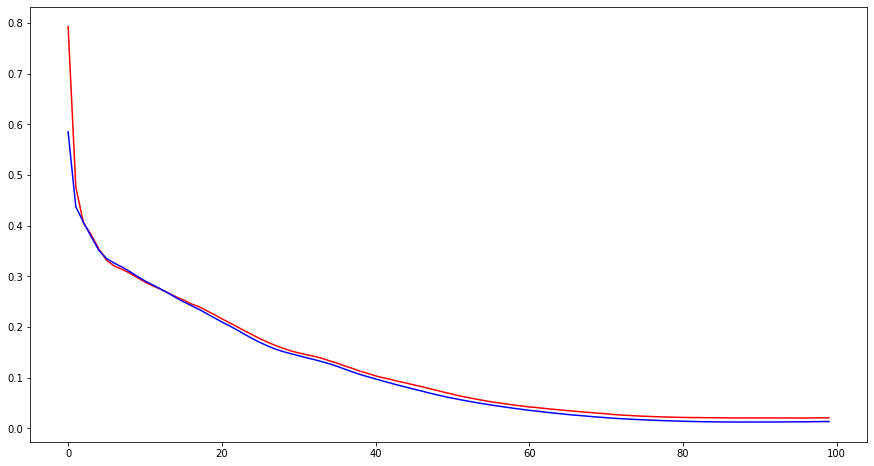

tensor(0.1098, dtype=torch.float64, grad_fn=<SqrtBackward0>)
tensor(1.0503, dtype=torch.float64, grad_fn=<MeanBackward0>)
RMSE-transformers = 0.0967124290207692
MAE-transformers= 0.0745929953579403


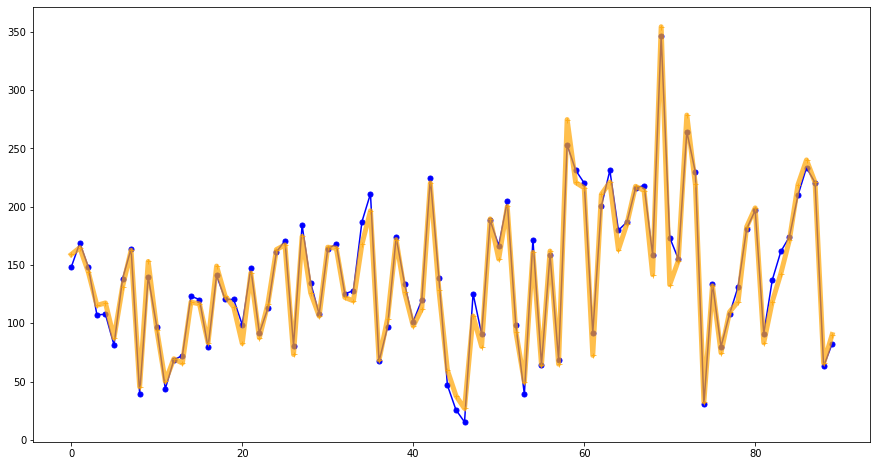

In [ ]:

def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=90, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    dataset = np.array(dataset)
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)


def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    # normalization

    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    data = (data - data_mean) / data_std
    stats = (data_mean, data_std)
   
    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=90, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)
    return train_data, val_data, test_data, stats


def split_fn(chunk):
    """to split the dataset sequences into input and targets sequences"""

    inputs = torch.tensor(chunk[:, :, :], device=device)
    targets = torch.tensor(chunk[:, :, 0], device=device).unsqueeze(-1)

    return inputs, targets


def data_to_dataset(train_data, val_data, test_data, batch_size=64, target_features=list(range(5))):
    '''
    split each train split into inputs and targets
    convert each train split into a tf.dataset
    '''
    x_train, y_train = split_fn(train_data)
    x_val, y_val = split_fn(val_data)
    x_test, y_test = split_fn(test_data)
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_data, val_data, test_data, stats = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

"""Implementation of the Transformer model"""

import torch.nn as nn
import math


class MultiHeadAttention(nn.Module):
    '''Multi-head self-attention module'''

    def __init__(self, D, H):
        super(MultiHeadAttention, self).__init__()
        self.H = H
        self.D = D

        self.wq = nn.Linear(D, D * H)
        self.wk = nn.Linear(D, D * H)
        self.wv = nn.Linear(D, D * H)

        self.dense = nn.Linear(D * H, D)

    def concat_heads(self, x):
        '''(B, H, S, D) => (B, S, D*H)'''
        B, H, S, D = x.shape
        x = x.permute((0, 2, 1, 3)).contiguous()  # (B, S, H, D)
        x = x.reshape((B, S, H * D))  # (B, S, D*H)
        return x

    def split_heads(self, x):
        '''(B, S, D*H) => (B, H, S, D)'''
        B, S, D_H = x.shape
        x = x.reshape(B, S, self.H, self.D)  # (B, S, H, D)
        x = x.permute((0, 2, 1, 3))  # (B, H, S, D)
        return x

    def forward(self, x, mask):
        q = self.wq(x)  # (B, S, D*H)
        k = self.wk(x)  # (B, S, D*H)
        v = self.wv(x)  # (B, S, D*H)

        q = self.split_heads(q)  # (B, H, S, D)
        k = self.split_heads(k)  # (B, H, S, D)
        v = self.split_heads(v)  # (B, H, S, D)

        attention_scores = torch.matmul(q, k.transpose(-1, -2))  # (B,H,S,S)
        attention_scores = attention_scores / math.sqrt(self.D)

        # add the mask to the scaled tensor.
        if mask is not None:
            attention_scores += (mask * -1e9)

        attention_weights = nn.Softmax(dim=-1)(attention_scores)
        scaled_attention = torch.matmul(attention_weights, v)  # (B, H, S, D)
        concat_attention = self.concat_heads(scaled_attention)  # (B, S, D*H)
        output = self.dense(concat_attention)  # (B, S, D)

        return output, attention_weights


# Positional encodings
def get_angles(pos, i, D):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(D))
    return pos * angle_rates


def positional_encoding(D, position=100, dim=3, device=device):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(D)[np.newaxis, :],
                            D)
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    if dim == 3:
        pos_encoding = angle_rads[np.newaxis, ...]
    elif dim == 4:
        pos_encoding = angle_rads[np.newaxis, np.newaxis, ...]
    return torch.tensor(pos_encoding, device=device)


# function that implement the look_ahead mask for masking future time steps.
def create_look_ahead_mask(size, device=device):
    mask = torch.ones((size, size), device=device)
    mask = torch.triu(mask, diagonal=1)
    return mask  # (size, size)



class TransformerLayer(nn.Module):
    def __init__(self, D, H, hidden_mlp_dim, dropout_rate):
        super(TransformerLayer, self).__init__()
        self.dropout_rate = dropout_rate
        self.mlp_hidden = nn.Linear(D, hidden_mlp_dim)
        self.mlp_out = nn.Linear(hidden_mlp_dim, D)
        self.layernorm1 = nn.LayerNorm(D, eps=1e-9)
        self.layernorm2 = nn.LayerNorm(D, eps=1e-9)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

        self.mha = MultiHeadAttention(D, H)

    def forward(self, x, look_ahead_mask):
        attn, attn_weights = self.mha(x, look_ahead_mask)  # (B, S, D)
        attn = self.dropout1(attn)  # (B,S,D)
        attn = self.layernorm1(attn + x)  # (B,S,D)

        mlp_act = torch.relu(self.mlp_hidden(attn))
        mlp_act = self.mlp_out(mlp_act)
        mlp_act = self.dropout2(mlp_act)

        output = self.layernorm2(mlp_act + attn)  # (B, S, D)

        return output, attn_weights



class Transformer(nn.Module):
    '''Transformer Decoder Implementating several Decoder Layers.
    '''

    def __init__(self, num_layers, D, H, hidden_mlp_dim, inp_features, out_features, dropout_rate, pred_len):
        super(Transformer, self).__init__()
        self.D = D
        self.sqrt_D = torch.tensor(math.sqrt(D))
        self.num_layers = num_layers
        self.input_projection = nn.LSTM(inp_features, D)  # multivariate input
        self.output_projection = nn.Linear(D, out_features)  # multivariate output
        self.pos_encoding = positional_encoding(D)
        self.dec_layers = nn.ModuleList([TransformerLayer(D, H, hidden_mlp_dim,
                                                          dropout_rate=dropout_rate
                                                          ) for _ in range(num_layers)])
        self.dropout = nn.Dropout(dropout_rate)
        self.pred_len = pred_len
        
    def max_pooling(model_output, attention_mask):
       token_embeddings = model_output[0] #First element of model_output contains all token embeddings
       input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
       token_embeddings[input_mask_expanded == 0] = -1e9  # Set padding tokens to large negative value
       return torch.max(token_embeddings, 1)[0]

    def forward(self, x, mask):
        B, S, D = x.shape
        attention_weights = {}
        hidden = torch.zeros((1, B, self.D), dtype=torch.double)
        x, _ = self.input_projection(x.permute(1, 0, 2), (hidden, hidden))
        x = x.permute(1, 0, 2)
        x *= self.sqrt_D

        x += self.pos_encoding[:, :S, :]
        #print(x.shape)

        for i in range(self.num_layers):
            x, block = self.dec_layers[i](x=x,
                                          look_ahead_mask=mask)
            attention_weights['decoder_layer{}'.format(i + 1)] = block

        x = self.output_projection(x)
        #print(x.shape)
        #print(self.pred_len)
        x = x[:, -self.pred_len:, :]

        return x, attention_weights  # (B,S,S)


# Test Forward pass on the Transformer:
pred_len = 90
transformer = Transformer(num_layers=1, D=32, H=8, hidden_mlp_dim=16,
                          inp_features=5, out_features=1, dropout_rate=0.1, pred_len=pred_len).double()
transformer.to(device)
optimizer = torch.optim.RMSprop(transformer.parameters(),
                                lr=0.00005)

best_model = transformer
from tqdm import tqdm

n_epochs = 100
niter = len(train_dataset)
losses, val_losses = [], []

val_loss = 1e5

for e in tqdm(range(n_epochs)):

    # one epoch on train set
    transformer.train()
    sum_train_loss = 0.0
    for x, y in train_dataset:

        S = x.shape[1]
        y = y[:, 0:pred_len, :]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    losses.append(sum_train_loss / niter)

    # Evaluate on val set
    transformer.eval()
    sum_val_loss = 0.0
    for i, (x, y) in enumerate(val_dataset):
        S = x.shape[1]
        mask = create_look_ahead_mask(S)
        out, _ = transformer(x, mask)
        loss = torch.nn.MSELoss()(out, y)
        sum_val_loss += loss.item()
        if sum_val_loss < val_loss:
          val_loss = sum_val_loss
          best_model = transformer
        print(sum_val_loss)
    val_losses.append(sum_val_loss / (i + 1))

plt.plot(losses, 'red', label='Train Loss')
plt.plot(val_losses, 'blue', label='Validation Loss')
plt.show()
plt.close()

test_losses, test_preds = [], []
transformer.eval()
for (x, y) in test_dataset:
    S = x.shape[-2]
    y_pred, _ = transformer(x,
                            mask=create_look_ahead_mask(S))
    loss_test = torch.nn.MSELoss()(y_pred, y)  # (B,S)
    test_losses.append(loss_test.item())
    test_preds.append(y_pred.detach().cpu().numpy())
test_preds = np.vstack(test_preds)
np.mean(test_losses)


def RMSELoss(y_pred, y):
    return torch.sqrt(torch.mean((y_pred - y) ** 2))


criterion = RMSELoss
loss = criterion(y_pred, y)
print(loss)


def MAPELoss(y_pred, y):
    return torch.mean(torch.abs((y - y_pred) / y))


criterion = MAPELoss
loss = criterion(y_pred, y)
print(loss)


# Display predictions vs ground truth:
# we'll take one random element of the first batch
# and display the first feature
feature_num = 0

_, y_test = test_dataset.dataset.tensors
y_test = y_test[1, :, feature_num].cpu().numpy()
pred = test_preds[1, :, feature_num]
x = np.linspace(1, pred_len, pred_len)
'''plt.plot(x, pred, 'red', lw=2, label='predictions for sample: {}'.format(1))
plt.plot(x, y_test[:pred_len], 'cyan', lw=2, label='ground-truth for sample: {}'.format(1))
plt.legend(fontsize=10)
plt.show()'''

MSE = np.square(np.subtract(y_test,pred)).mean() 
RMSE = math.sqrt(MSE) #RMSE
print('RMSE-transformers =' , RMSE)

MAE = np.mean(np.abs(pred - y_test))    # MAE
print('MAE-transformers=', MAE)

data_mean, data_std = stats 
pred = test_preds*data_std[0]+ data_mean[0]
y = y_test*data_std[0] + data_mean[0]

prediction = pd.DataFrame(pred[1],columns=['prediction_TRANS']).to_csv('T30.csv')
prediction = pd.DataFrame(y, columns=['realdata']).to_csv('realdata30.csv')
plt.plot(y, color='blue',marker='o', markerfacecolor='blue', markersize=5,)
plt.plot(pred[1], alpha=0.7, marker = '+',markersize=5, color='orange', linewidth = '5')

RNN

Epoch 1/100
15/15 - 1s - loss: 0.7890 - val_loss: 0.5586 - 1s/epoch - 100ms/step
Epoch 2/100
15/15 - 1s - loss: 0.5198 - val_loss: 0.5265 - 515ms/epoch - 34ms/step
Epoch 3/100
15/15 - 1s - loss: 0.4961 - val_loss: 0.5066 - 504ms/epoch - 34ms/step
Epoch 4/100
15/15 - 1s - loss: 0.4772 - val_loss: 0.4876 - 515ms/epoch - 34ms/step
Epoch 5/100
15/15 - 1s - loss: 0.4627 - val_loss: 0.4844 - 507ms/epoch - 34ms/step
Epoch 6/100
15/15 - 1s - loss: 0.4555 - val_loss: 0.4703 - 527ms/epoch - 35ms/step
Epoch 7/100
15/15 - 0s - loss: 0.4361 - val_loss: 0.4445 - 498ms/epoch - 33ms/step
Epoch 8/100
15/15 - 1s - loss: 0.4140 - val_loss: 0.4219 - 512ms/epoch - 34ms/step
Epoch 9/100
15/15 - 1s - loss: 0.4132 - val_loss: 0.4149 - 508ms/epoch - 34ms/step
Epoch 10/100
15/15 - 1s - loss: 0.3990 - val_loss: 0.4017 - 511ms/epoch - 34ms/step
Epoch 11/100
15/15 - 0s - loss: 0.3824 - val_loss: 0.3893 - 494ms/epoch - 33ms/step
Epoch 12/100
15/15 - 1s - loss: 0.3718 - val_loss: 0.3800 - 517ms/epoch - 34ms/step
Epo

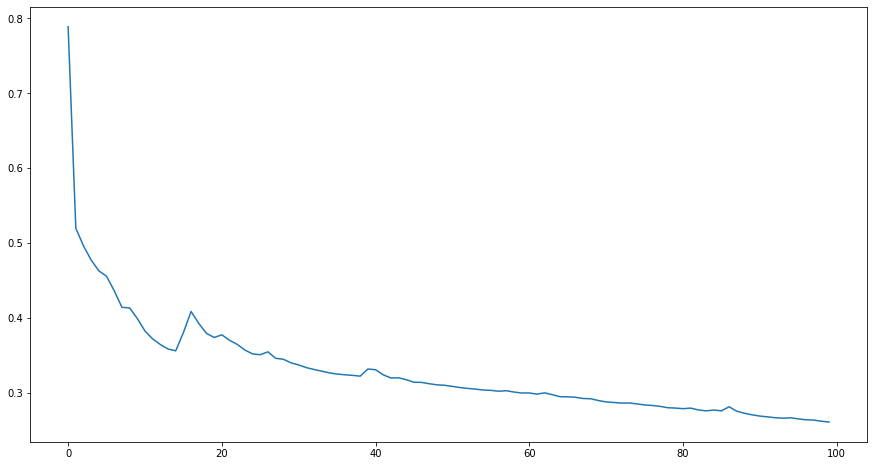

RMSE-RNN = 0.5615560758426517
MAE-RNN = 0.4232094072584599


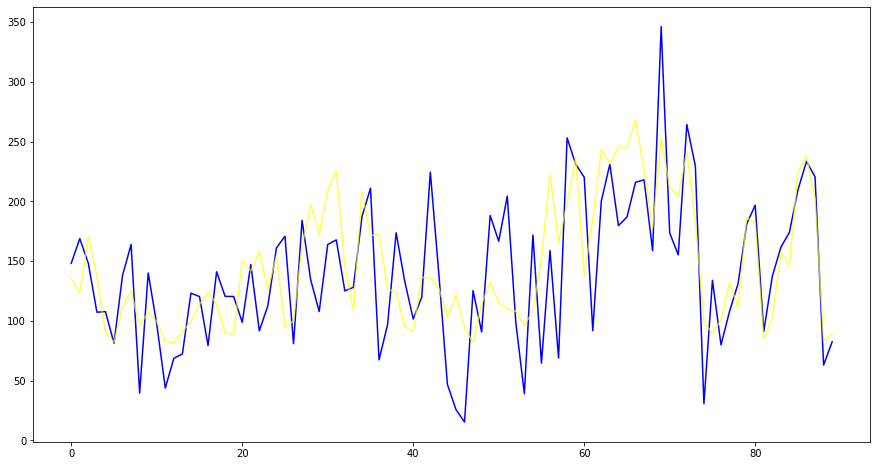

In [ ]:
from keras.callbacks import History

trainX, trainY = train_dataset.dataset.tensors[0].detach().numpy(), train_dataset.dataset.tensors[1].detach().numpy()
trainY = trainY[:, 0:pred_len, :]
testX, testY = test_dataset.dataset.tensors[0].detach().numpy(), test_dataset.dataset.tensors[1].detach().numpy()
testY = testY[:, 0:pred_len, :]
x_val, y_val = val_dataset.dataset.tensors[0].detach().numpy(), val_dataset.dataset.tensors[1].detach().numpy()
y_val = y_val[:, 0:pred_len, :]

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=128, dense_units = pred_len, input_shape =(trainX.shape[1], trainX.shape[2]),  
                   activation=['tanh', 'tanh'])
                   
model_fit = model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2, validation_data=(x_val,y_val))
model_output = model.predict(testX)
results = pd.DataFrame({"Train Loss": model_fit.history['loss'], "Validation Loss": model_fit.history['val_loss']})
#results[["Train results", "Validation Loss"]].plot()
plt.plot(results['Train Loss'])
plt.show()


testY = testY.reshape(testY.shape[0], testY.shape[1], )


#MAE and RMSE
MSE = np.square(np.subtract(testY,model_output)).mean() 
RMSE = math.sqrt(MSE)
print('RMSE-RNN =', RMSE)

mae = np.mean(np.abs(model_output - testY))    # MAE
print('MAE-RNN =', mae)
prediction_RNN = model_output

data_mean, data_std = stats 
prediction_RNN = prediction_RNN*data_std[0]+ data_mean[0]
testY = testY*data_std[0] + data_mean[0]

plt.plot(testY[1], color='blue',label='Actual power consumption data')
plt.plot(prediction_RNN[1], alpha=0.7, color='yellow',label='RNN')
prediction = pd.DataFrame(prediction_RNN[1], columns=['prediction_RNN']).to_csv('RNN7.csv')


LSTM

Epoch 1/100
15/15 [==============================] - 5s 200ms/step - loss: 0.7824 - mse: 0.7824 - val_loss: 0.5929 - val_mse: 0.5929
Epoch 2/100
15/15 [==============================] - 2s 166ms/step - loss: 0.4983 - mse: 0.4983 - val_loss: 0.4759 - val_mse: 0.4759
Epoch 3/100
15/15 [==============================] - 2s 163ms/step - loss: 0.4526 - mse: 0.4526 - val_loss: 0.4608 - val_mse: 0.4608
Epoch 4/100
15/15 [==============================] - 2s 164ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.4450 - val_mse: 0.4450
Epoch 5/100
15/15 [==============================] - 2s 164ms/step - loss: 0.4205 - mse: 0.4205 - val_loss: 0.4319 - val_mse: 0.4319
Epoch 6/100
15/15 [==============================] - 2s 163ms/step - loss: 0.4010 - mse: 0.4010 - val_loss: 0.4052 - val_mse: 0.4052
Epoch 7/100
15/15 [==============================] - 2s 164ms/step - loss: 0.3835 - mse: 0.3835 - val_loss: 0.3864 - val_mse: 0.3864
Epoch 8/100
15/15 [==============================] - 2s 165ms/step - 

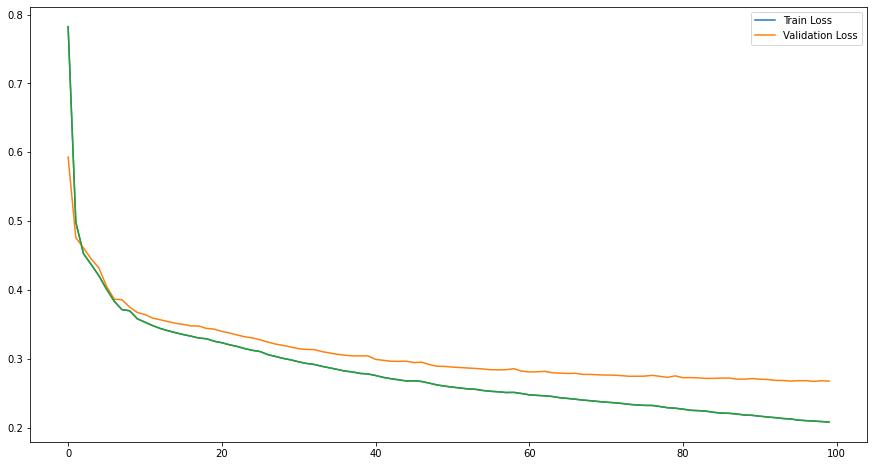

RMSE-LSTM= 0.5274860847645482
MAE-LSTM = 0.4045504517830661


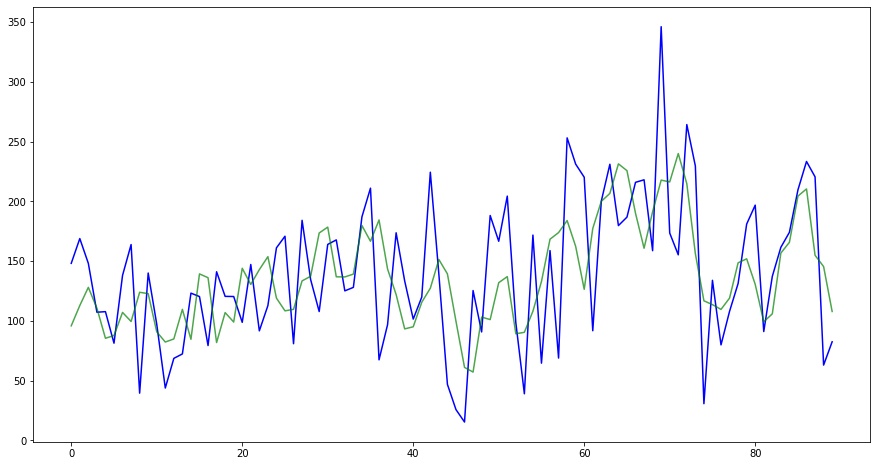

In [ ]:

trainX, trainY = train_dataset.dataset.tensors[0].detach().numpy(), train_dataset.dataset.tensors[1].detach().numpy()
trainY = trainY[:, 0:pred_len, :]
testX, testY = test_dataset.dataset.tensors[0].detach().numpy(), test_dataset.dataset.tensors[1].detach().numpy()
testY = testY[:, 0:pred_len, :]
x_val, y_val = val_dataset.dataset.tensors[0].detach().numpy(), val_dataset.dataset.tensors[1].detach().numpy()
y_val = y_val[:, 0:pred_len, :]
# reshape input to be [samples, time steps, features]
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(pred_len, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model_fit = model.fit(trainX, trainY, epochs=100, batch_size=64,  validation_data=(x_val,y_val))
model_output = model.predict(testX)
resultsLSTM = pd.DataFrame({"Train Loss": model_fit.history['loss'], "Validation Loss": model_fit.history['val_loss']})
resultsLSTM[["Train Loss", "Validation Loss"]].plot()
plt.plot(resultsLSTM['Train Loss'])
plt.show()


testY = testY.reshape(testY.shape[0], testY.shape[1], )

MSE = np.square(np.subtract(testY,model_output)).mean() 
RMSE = math.sqrt(MSE)
print('RMSE-LSTM=', RMSE)

mae = np.mean(np.abs(model_output - testY))    # MAE
print('MAE-LSTM =', mae)


'''history = model.fit(trainX, trainY, epochs=100, batch_size=70, validation_data=(testX, testY), verbose=2, shuffle=False)
'''
"""# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
"""
prediction_LSTM = model_output
data_mean, data_std = stats 
prediction_LSTM = prediction_LSTM*data_std[0]+ data_mean[0]
testY = testY*data_std[0] + data_mean[0]

plt.plot(testY[1], color='blue',label='Actual power consumption data')
plt.plot(prediction_LSTM[1], alpha=0.7, color='green',label='RNN')
prediction = pd.DataFrame(prediction_LSTM[1], columns=['prediction_LSTM']).to_csv('LSTM7.csv')
prediction = pd.DataFrame(prediction_LSTM[1], columns=['prediction_LSTM']).to_csv('LSTM7.csv')



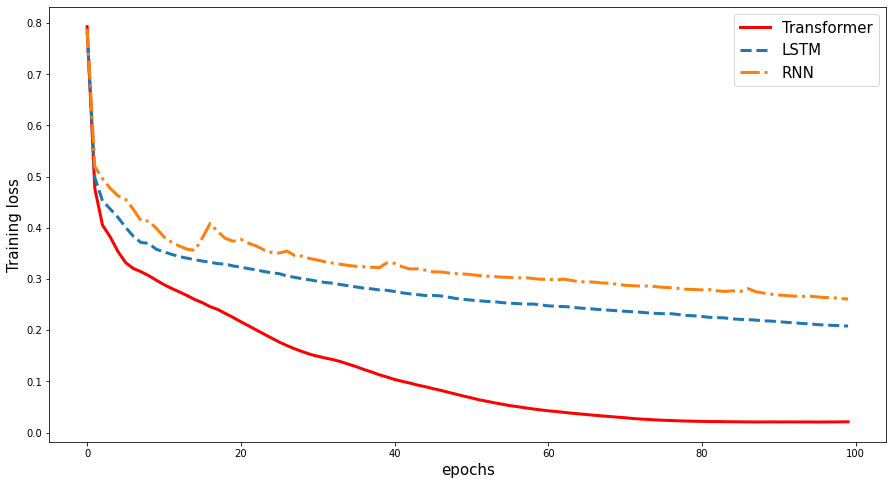

In [ ]:
plt.plot(losses, 'red', label='Transformer', linewidth=3)
plt.plot(resultsLSTM['Train Loss'], linestyle='dashed', linewidth=3)
plt.plot(results['Train Loss'], linestyle='-.', linewidth=3)
plt.xlabel('epochs', fontsize = 15)
plt.ylabel('Training loss', fontsize = 15)
plt.legend(['Transformer', 'LSTM', 'RNN'], fontsize = 15)

plt.show()


ARIMA

In [ ]:
def split_dataset_into_seq(dataset, start_index=0, end_index=None, history_size=90, step=1):
    '''split the dataset to have sequence of observations of length history size'''
    dataset = np.array(dataset)
    data = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset)
    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
    return np.array(data)


def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    # normalization

    print(data)
    data_mean = data.mean(axis=0)
    print(data_mean)
    data_std = data.std(axis=0)
    data = (data - data_mean) / data_std
    stats = (data_mean, data_std)
   
    data_in_seq = split_dataset_into_seq(data, start_index=0, end_index=None, history_size=90, step=1)

    # split between validation dataset and test set:
    train_data, val_data = train_test_split(data_in_seq, train_size=TRAIN_SPLIT, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, train_size=VAL_SPLIT, shuffle=True, random_state=123)
    return train_data, val_data, test_data, stats


def split_fn(chunk):
    """to split the dataset sequences into input and targets sequences"""

    inputs = torch.tensor(chunk[:, :, :], device=device)
    targets = torch.tensor(chunk[:, :, 0], device=device).unsqueeze(-1)

    return inputs, targets


def data_to_dataset(train_data, val_data, test_data, batch_size=64, target_features=list(range(5))):
    '''
    split each train split into inputs and targets
    convert each train split into a tf.dataset
    '''
    x_train, y_train = split_fn(train_data)
    x_val, y_val = split_fn(val_data)
    x_test, y_test = split_fn(test_data)
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_data, val_data, test_data, stats = split_dataset(data)
train_dataset, val_dataset, test_dataset = data_to_dataset(train_data, val_data, test_data)

train, valid, test, stats = split_dataset(data)
_, _, test_dataset = data_to_dataset(train, valid, test)
testX, testY = test_dataset.dataset.tensors[0].detach().numpy(), test_dataset.dataset.tensors[1].detach().numpy()

testX = testX[:, :, 0]
testY = testY[:, 0:pred_len, 0]

forecast_all = []

for s in range(len(testX)):
  forecast = []
  for i in range(testY.shape[1]):
    model=ARIMA(testX[s],order=(1,1,0))
    f = model.fit().forecast()[0]
    train = np.concatenate((testX[i], f))
    forecast.append(f)
  forecast_all.append(forecast)

forecast = np.array(forecast_all)
forecasat_ARIMA = forecast[:, :, 0]

MSE = np.square(np.subtract(testY,forecasat_ARIMA)).mean() 
RMSE = math.sqrt(MSE)
print(RMSE)
mae = np.mean(np.abs(forecasat_ARIMA - testY)) 
print(mae)

data_mean, data_std = stats 
forecasat_ARIMA = forecasat_ARIMA*data_std[0]+ data_mean[0]
testY = testY*data_std[0] + data_mean[0]

             Energy  weekday  max0  pcpn  snow
TIME                                          
2018-01-01    6.504        1    30   0.0   0.0
2018-01-02   17.527        1    46   0.0   0.0
2018-01-03   11.227        0    50   0.0   0.0
2018-01-04   49.748        0    52   0.0   0.0
2018-01-05    2.956        0    62   0.0   0.0
...             ...      ...   ...   ...   ...
2021-11-26  271.067        0    72   0.0   0.0
2021-11-27  203.999        0    58   0.0   0.0
2021-11-28  275.529        0    67   0.0   0.0
2021-11-29  280.653        1    74   0.0   0.0
2021-11-30  209.820        1    59   0.0   0.0

[1425 rows x 5 columns]
Energy     179.839142
weekday      0.287018
max0        66.785965
pcpn         0.051425
snow         0.248772
dtype: float64
             Energy  weekday  max0  pcpn  snow
TIME                                          
2018-01-01    6.504        1    30   0.0   0.0
2018-01-02   17.527        1    46   0.0   0.0
2018-01-03   11.227        0    50   0.0   0.0
2018

(201, 90)
(201, 90)


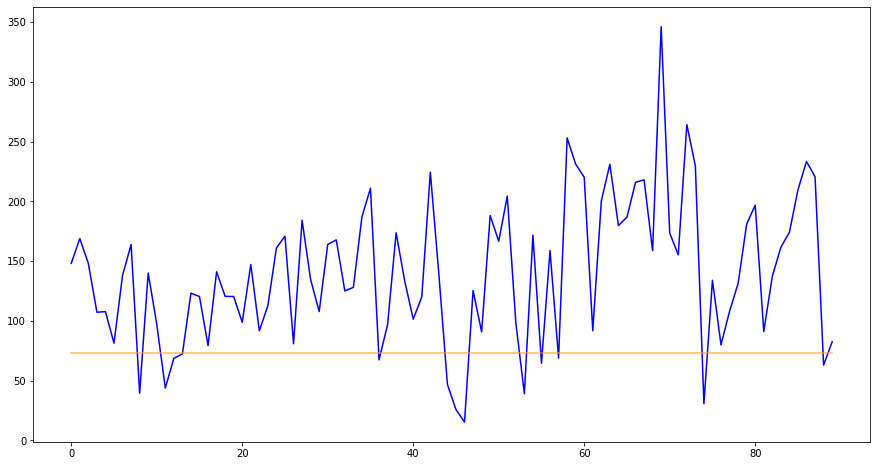

In [ ]:
print(testY.shape)
print(forecasat_ARIMA.shape)
plt.plot(testY[1], color='blue',label='Actual power consumption data')
plt.plot(forecasat_ARIMA[1], alpha=0.7, color='orange',label='ARIMA')

prediction = pd.DataFrame(forecasat_ARIMA[1], columns=['forecasat_ARIMA' ]).to_csv('ARIMA30.csv')
prediction = pd.DataFrame(testY[1], columns=['realdata']).to_csv('realdata90.csv')